In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pydot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# !pip install pydot

In [3]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [4]:
x_train_digit[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

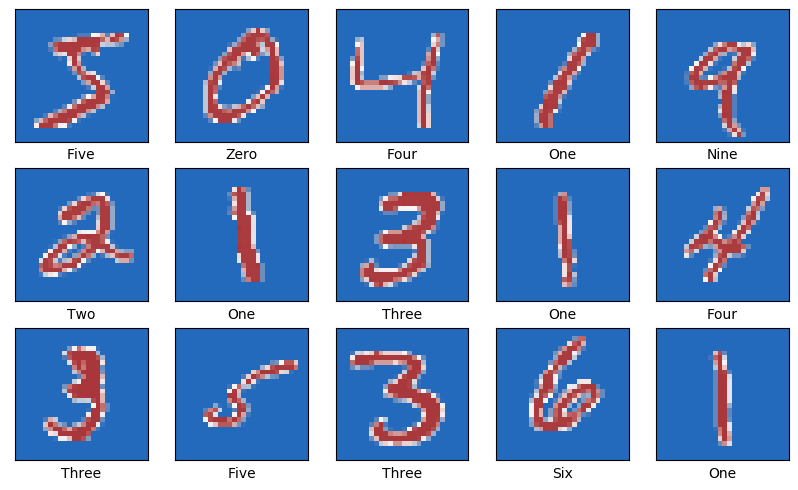

In [6]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='vlag')
    plt.xlabel(col_names[y_train_digit[i]])

In [7]:
x_train_digit.shape

(60000, 28, 28)

In [8]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)


In [9]:
x_train_digit[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [12]:
y_train_digit.shape

(60000, 10)

In [13]:
y_train_digit[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
model=keras.Sequential([
    layers.Dense(256,activation="relu",input_shape=(784,)),
    #layers.Dropout(0,3),
    #layers.BatchNormal(),
    layers.Dense(64,activation="relu"),
    #layers.Dropout(0,3),
    #layers.BatchNormal(),
    layers.Dense(64,activation="relu"),
    #layers.Dropout(0,3),
    #layers.BatchNormal(),
    layers.Dense(10,activation="sigmoid"),
])

In [15]:
model

In [16]:
#param=(input*output)+output====>(784*256)+256 = 200960
#                            ====>(256*64)+64 = 16448
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss
              ="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [18]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 1.2971 - accuracy: 0.8375 - val_loss: 0.3944 - val_accuracy: 0.9061
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2816 - accuracy: 0.9275 - val_loss: 0.2909 - val_accuracy: 0.9274
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2004 - accuracy: 0.9456 - val_loss: 0.2219 - val_accuracy: 0.9453
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1599 - accuracy: 0.9561 - val_loss: 0.1949 - val_accuracy: 0.9501
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1510 - accuracy: 0.9593 - val_loss: 0.2145 - val_accuracy: 0.9511
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1278 - accuracy: 0.9645 - val_loss: 0.1866 - val_accuracy: 0.9530
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1165 - accuracy: 0.9677 - val_loss: 0.1694 - val_accuracy: 0.9589
Epoch 

In [19]:
y_predict=model.predict(x_test_digit)

In [20]:
y_predict

array([[4.9645645e-11, 9.0001255e-01, 9.9049801e-01, ..., 1.0000000e+00,
        2.1858693e-10, 2.3007393e-04],
       [2.9361136e-05, 4.5783700e-06, 1.0000000e+00, ..., 1.8271804e-04,
        3.9285350e-12, 1.8858626e-09],
       [3.6006684e-09, 1.0000000e+00, 7.5885516e-01, ..., 9.9995351e-01,
        6.2574059e-02, 8.5086852e-02],
       ...,
       [1.4084457e-05, 9.7666144e-01, 6.5182924e-01, ..., 8.7972486e-01,
        6.4769387e-04, 9.9999344e-01],
       [3.0101776e-02, 7.8124022e-01, 2.6522994e-07, ..., 5.6290627e-04,
        5.6052506e-03, 2.6584491e-08],
       [1.0000000e+00, 3.3874065e-02, 9.9968237e-01, ..., 2.1119589e-01,
        8.5905194e-04, 3.4889352e-01]], dtype=float32)

In [21]:
y_predicts=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [22]:
y_predicts

array([7, 2, 1, ..., 4, 5, 0], dtype=int64)

In [23]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

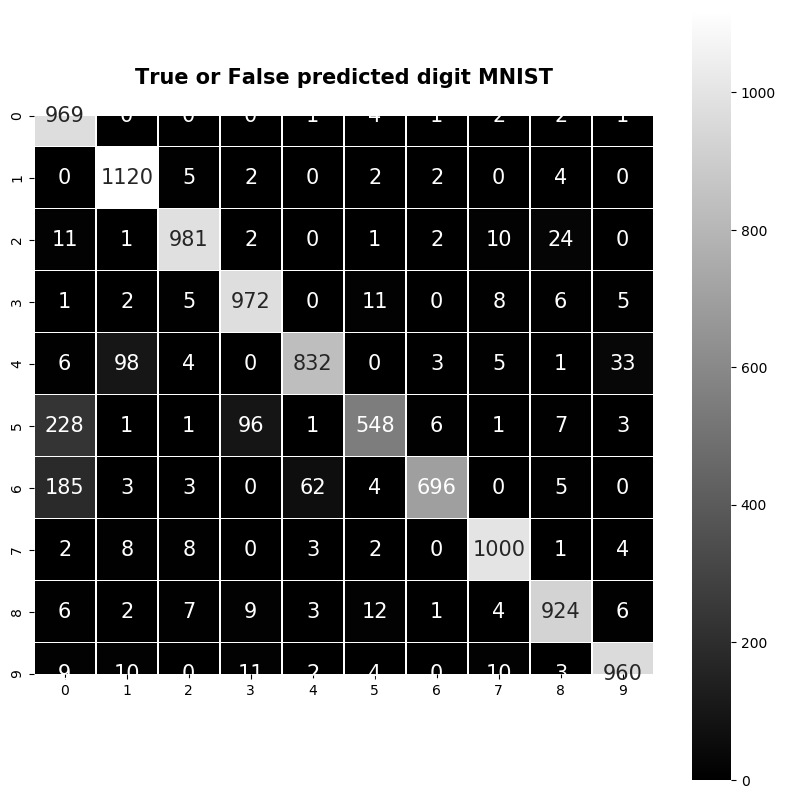

In [38]:
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="",cmap="gray",square=True)
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [25]:
from sklearn.metrics import classification_report

clf=classification_report(y_test_digit_eval,y_predicts)

In [26]:
print(clf)

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       980
           1       0.90      0.99      0.94      1135
           2       0.97      0.95      0.96      1032
           3       0.89      0.96      0.92      1010
           4       0.92      0.85      0.88       982
           5       0.93      0.61      0.74       892
           6       0.98      0.73      0.83       958
           7       0.96      0.97      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


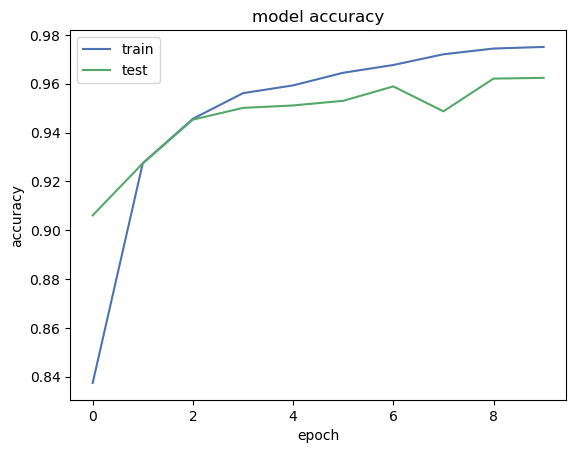

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

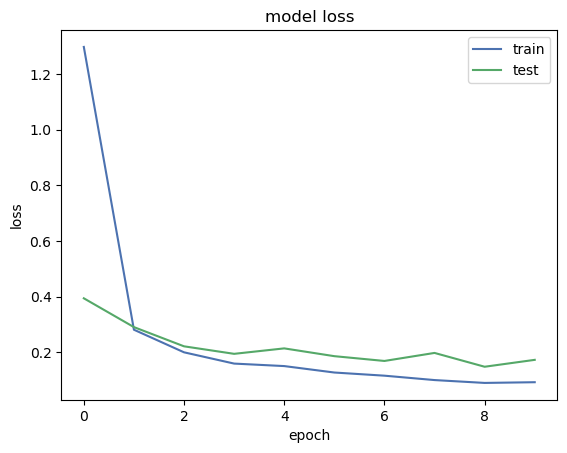

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [30]:
y_pred_single=model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_pred_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [31]:
y_pred_single

array([[3.6006960e-09, 1.0000000e+00, 7.5885522e-01, 7.0012355e-01,
        2.3352268e-01, 6.8944514e-02, 4.6816895e-06, 9.9995345e-01,
        6.2574118e-02, 8.5086972e-02]], dtype=float32)

In [32]:
y_predicts_single

array([1], dtype=int64)

In [33]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
# col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# plt.imshow(x_test_digit[2].reshape(28,28),cmap="gray")
# plt.xlabel("Accuracy:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_pred_single]))

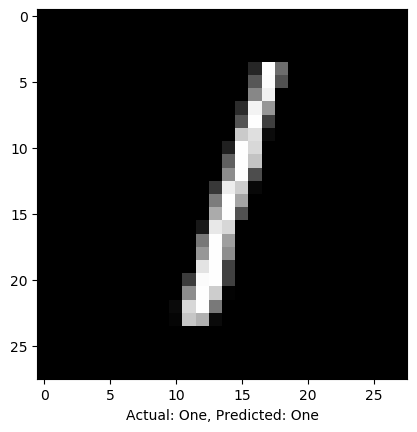

In [42]:
col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Show the digit image
plt.imshow(x_test_digit[2].reshape(28, 28), cmap="gray")

# Extract true and predicted label for index 2
true_label_index = np.argmax(y_test_digit[2])
pred_label_index = np.argmax(y_pred_single)

# Plot label
plt.xlabel("Actual: {}, Predicted: {}".format(
    col_names[true_label_index],
    col_names[pred_label_index]
))
plt.show()
